In [91]:
import pandas as pd
from statsbombpy import sb
from mplsoccer.pitch import Pitch

In [92]:
sb.matches(competition_id=43, season_id=106).head(10)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3857256,2022-12-02,21:00:00.000,International - FIFA World Cup,2022,Serbia,Switzerland,2,3,available,...,2023-04-26T23:49:58.956186,3,Group Stage,Stadium 974,Fernando Andrés Rapallini,Dragan Stojković,Murat Yakin,1.1.0,2,2
1,3869151,2022-12-03,21:00:00.000,International - FIFA World Cup,2022,Argentina,Australia,2,1,available,...,2023-07-30T07:48:51.865595,4,Round of 16,Ahmad bin Ali Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Graham James Arnold,1.1.0,2,2
2,3857257,2022-11-30,17:00:00.000,International - FIFA World Cup,2022,Australia,Denmark,1,0,available,...,2023-06-20T11:04:37.638969,3,Group Stage,Al Janoub Stadium,Mustapha Ghorbal,Graham James Arnold,Kasper Hjulmand,1.1.0,2,2
3,3857258,2022-11-24,21:00:00.000,International - FIFA World Cup,2022,Brazil,Serbia,2,0,available,...,2023-07-11T14:56:31.096588,1,Group Stage,Lusail Stadium,Alireza Faghani,Telê Santana da Silva,Dragan Stojković,1.1.0,2,2
4,3857288,2022-11-26,12:00:00.000,International - FIFA World Cup,2022,Tunisia,Australia,0,1,available,...,2023-04-27T00:30:07.835815,2,Group Stage,Al Janoub Stadium,Daniel Siebert,Jalel Kadri,Graham James Arnold,1.1.0,2,2
5,3857267,2022-11-29,17:00:00.000,International - FIFA World Cup,2022,Ecuador,Senegal,1,2,available,...,2023-05-19T13:52:07.885530,3,Group Stage,Sheikh Khalifa International Stadium,Clément Turpin,Gustavo Julio Alfaro,Aliou Cissé,1.1.0,2,2
6,3869321,2022-12-09,21:00:00.000,International - FIFA World Cup,2022,Netherlands,Argentina,2,2,available,...,2023-06-21T17:51:12.511460,5,Quarter-finals,Lusail Stadium,Antonio Miguel Mateu Lahoz,Louis van Gaal,Lionel Sebastián Scaloni,1.1.0,2,2
7,3857287,2022-11-24,15:00:00.000,International - FIFA World Cup,2022,Uruguay,South Korea,0,0,available,...,2023-04-27T00:36:59.281195,1,Group Stage,Education City Stadium,Clément Turpin,Diego Martín Alonso López,Paulo Jorge Gomes Bento,1.1.0,2,2
8,3869486,2022-12-10,17:00:00.000,International - FIFA World Cup,2022,Morocco,Portugal,1,0,available,...,2023-04-26T23:03:02.645780,5,Quarter-finals,Al Thumama Stadium,Facundo Tello Figueroa,Hoalid Regragui,Fernando Manuel Fernandes da Costa Santos,1.1.0,2,2
9,3869685,2022-12-18,17:00:00.000,International - FIFA World Cup,2022,Argentina,France,3,3,available,...,2023-08-17T15:55:15.164685,7,Final,Lusail Stadium,Szymon Marciniak,Lionel Sebastián Scaloni,Didier Deschamps,1.1.0,2,2


In [93]:
# Select the World Cup Final
match_id = 3869685

In [94]:
match_events_df = sb.events(match_id=match_id)

In [95]:
match_360_df = pd.read_json(f'C:/Users/dmsta/Documents/GitHub/open-data/data/three-sixty/{match_id}.json')

In [96]:
match_events_df['id']

0       0584ee21-e3dd-4d9f-95a0-5b5e84be25c3
1       b32679f8-942e-4122-96a2-015caf75e628
2       954f6855-de22-46a2-8d09-6fe94eec2b9b
3       6404a8e8-afaf-489d-b65e-173a237ffed5
4       e84fb5b3-270f-4427-bf97-1a6eaec7285f
                        ...                 
4402    da654dbc-5e9d-4067-ab4a-2db561a77c8f
4403    0e712309-2130-4ad9-ab32-cda2e26c4d0b
4404    4f66bdf1-2c51-483a-b45a-89b525bc23c0
4405    ed616313-3980-444e-805f-9951a40d8a52
4406    ad6e8237-8cb9-44f4-b9fb-356f066f3b2b
Name: id, Length: 4407, dtype: object

In [97]:
match_360_df['event_uuid']

0       f651a6c4-55e3-4e0f-a178-59414ba83d6a
1       97b5dc82-547a-4f93-a632-a2a8daf5ac98
2       9707e590-1d55-4d25-a50f-475019356152
3       a5956ecc-d637-44d2-8705-e2079e12013e
4       5ba6dfab-49f0-4225-bbb6-8b1e27bc729a
                        ...                 
3678    97439112-dfb5-4bd5-9967-554095296096
3679    50dcde1a-faa3-4eec-a0cd-3f09a7cf763a
3680    54e27ba9-b9ae-44a3-ac8d-fc91e76a1b91
3681    bcc6d4ae-f71c-4566-bf2d-c12f910eb526
3682    66eaf262-999f-4953-a924-f1b596de4dbf
Name: event_uuid, Length: 3683, dtype: object

In [98]:
df = pd.merge(left=match_events_df, right=match_360_df, left_on='id', right_on='event_uuid', how='left')

In [99]:
df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_offensive', 'ball_recovery_recovery_failure',
       'block_deflection', 'block_offensive', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_other', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive',
       'foul_committed_penalty', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'interception_outcome', 'location', 'match_id', 'minute', 'off_camera',
       'out', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id'

In [100]:
# Select Messi
messi = 5503
df = df[df['player_id'] == messi]

In [101]:
# Select Passes
df = df[df['type'] == 'Pass'].reset_index(drop=True)

In [102]:
# Split location column into x and y
df[['x_start', 'y_start']] = pd.DataFrame(df['location'].tolist(), index=df.index)

In [103]:
# Split Location End into x and y
df[['x_end', 'y_end']] = pd.DataFrame(df['pass_end_location'].tolist(), index=df.index)

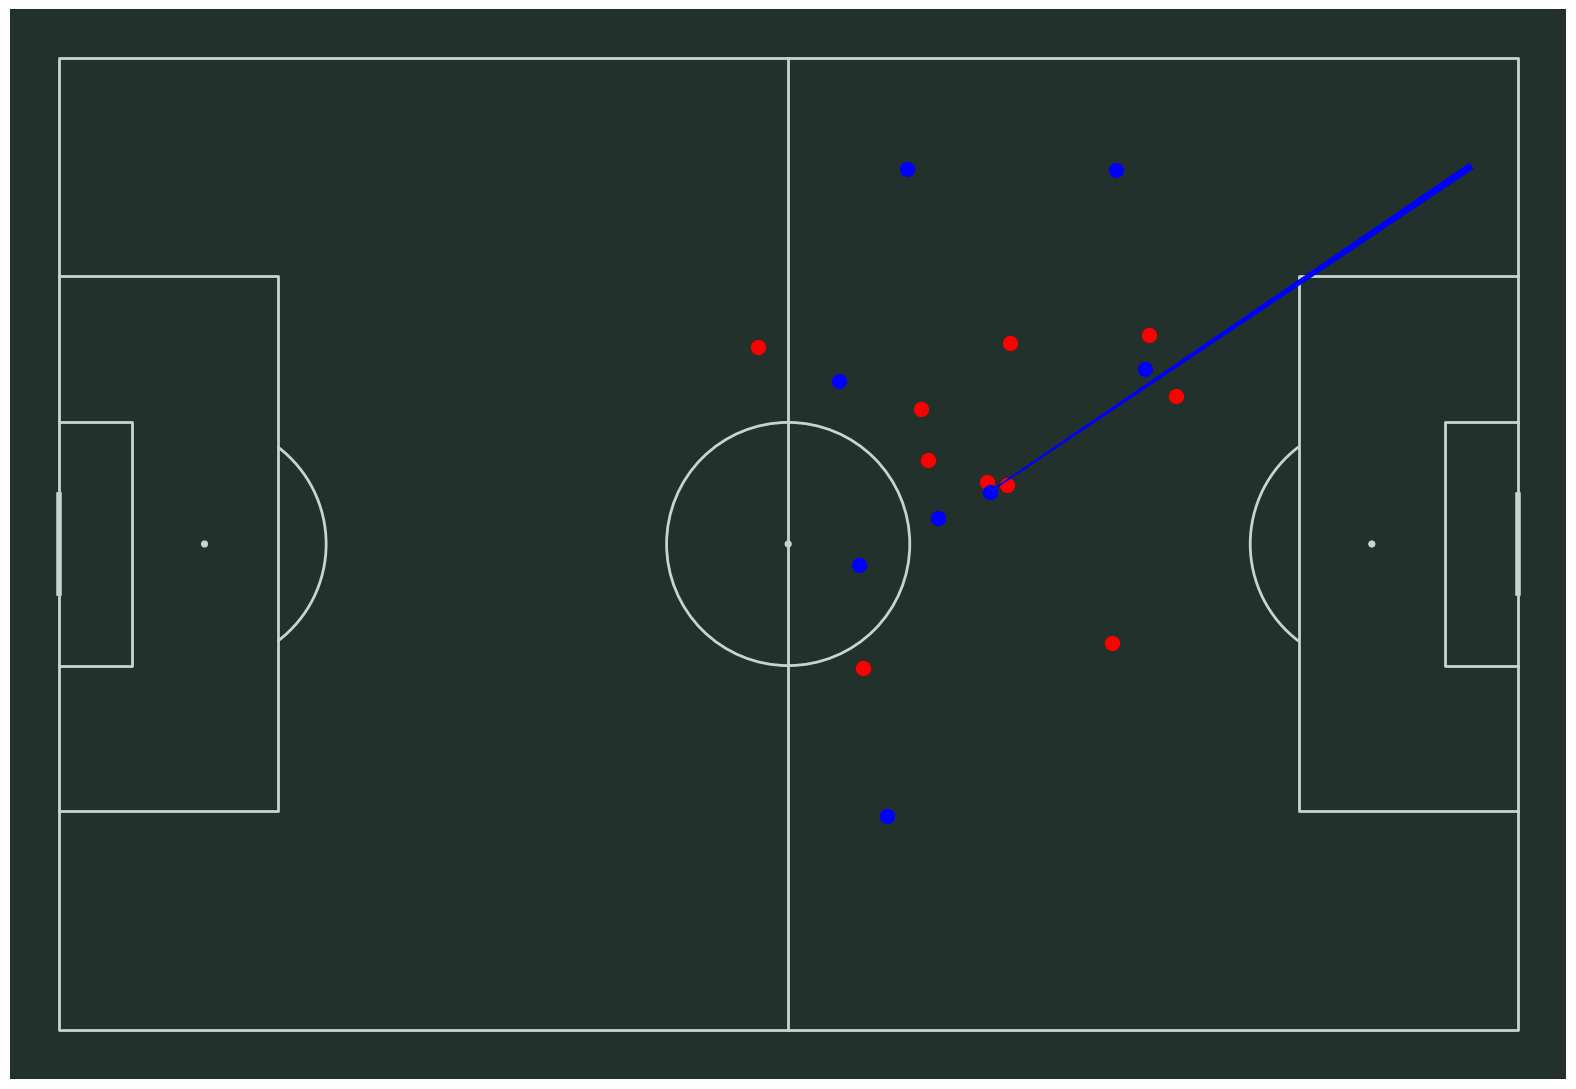

In [104]:
# Create a pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', 
              line_color='#c7d5cc')
fig, ax  = pitch.draw(figsize=(16, 11))

# Filtering to one of Messi's first pass
df = df[0:1]

pitch.scatter(df['x_start'], df['y_start'], ax=ax, color='blue')
pitch.lines(df['x_start'], df['y_start'], df['x_end'], df['y_end'], ax=ax, color='blue', comet = True, label='Pass')

# Plotting where the other players were
for x in df.iloc[0]['freeze_frame']:
    if x['teammate'] == True:
        color = 'blue'
    else:
        color = 'red'
    pitch.scatter(x=x['location'][0], y=x['location'][1], ax=ax, color=color, s=100)